In [11]:
from src.models.rvae import get_model
from src.models.common import *
from src.data.data_loader import *
import pandas as pd

In [12]:
model = get_model()

In [13]:
data = pd.read_pickle("../../data/interim/hydrated/200316.pkl")



dataset_test = TwitterDataset(data.iloc[int(len(data)*0.8):int(len(data)*0.8)+10, :].copy())

batch_size = 10
test_loader = get_loader(dataset_test, batch_size)

x = next(iter(test_loader))

output = model(x)

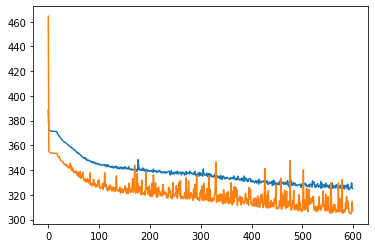

In [17]:
import matplotlib.pyplot as plt
plt.plot(get_checkpoint("RecurrentVariationalAutoencoder")['training_loss'])
plt.plot(get_checkpoint("RecurrentVariationalAutoencoder")['validation_loss'])

In [15]:
from torch.nn.utils.rnn import pad_packed_sequence, PackedSequence
x_rec = PackedSequence(output['px'].sample(), x.batch_sizes)
x_rec_padded, _ = pad_packed_sequence(x_rec)
original_padded, _ = pad_packed_sequence(x)

In [16]:
for original, output in zip(original_padded.transpose(1,0), x_rec_padded.transpose(1, 0)):
    print("".join([alphabet[i] for i in original][:100]))
    print("".join([alphabet[i] for i in output][:100]))
    print("")

july or august he's not worried about the american people he's more worried about the #stockmarket &
vaslad 'e   t ntyed stmtenracey,a  hk wimueshgenngcohr’ttoeuchi iahuc  i nfgleethniemifudrrtc prn en

moving classes online creates challenges for students who don't have access to reliable laptops and 
sokkpn nd eier o cs arrna s hoaisea,areaols hegm inetc,nueeeindbalgohwnlshlnnbao ttlemk   u scoienhi

in the us when people meet others who have served in the military they say 'thank you for your servi
en lhtua iiyfeusewheatsoiashcimehos   rd nnheshnl ufoefo      nvfh..palhwtey  stnennphnnco rilresa d

president unveils guidelines for americans during covid19 pandemicU city daycare, pre school closure
#yoaposb innmcrar ieieeas tc waiir gcac eaav nnt ccvvid99 aedecn ynambe aey:&w noufee dale ai nc hwa

i love when trump admits that he's not a professional. #coronavirus #letmelettheprofessionalsanswert
a wuc g mt dgttnf  a ihstsseg oupoorenhe brtaa. gews. #cooonvvvruusadaakgereotsnsynrit 

In [11]:
x_rec_padded

(tensor([[ 8,  3, 19,  ...,  0, 19, 19],
         [15, 54, 54,  ...,  8, 20, 19],
         [54,  2,  4,  ..., 17, 17, 17],
         ...,
         [53, 53,  0,  ...,  0,  0,  0],
         [53,  4,  0,  ...,  0,  0,  0],
         [18, 53,  0,  ...,  0,  0,  0]]),
 tensor([270, 270, 219, 150, 149, 126, 126, 117,  62,  37]))